# ECH 60 Spring 2020 week 7
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(7.1) Finite Differences](#fd) (Monday, Wednesday)**
*  [Derivatives from discrete points](#discrete) <br>
*  [Finite differences from Taylor series expansions](#taylor) <br>
*  [End corrections](#end) <br>
*  [Higher derivatives and higher-order methods](#higher)

**[(7.2) Numerical Partial Differentiation](#others) (Friday)**
*  [Partial finite differences](#partial) <br>
*  [An application: heat conduction](#heat) <br>
*  [Python inbuilt routines](#inbuilt) <br>

**[Practice problems](#exer)**



<a id='fd'></a>



## (7.1) Finite Differences

Differentiation gives the rate of the change of a quantity. We know that the rate of change of displacement is the velocity, and that the rate of change of velocity is the acceleration. We often have to deal with changes in properties like density, temperature, concentration, signal intensity, voltage etc with respect to time: in other word, we need the time derivative. Spatial derivatives of concentration or momentum or temperature arise in the analysis of 'fluxes' in the transport of materials.

If the functional form of the variable is known, we know how to determine derivatives. If the position is given by $y=at^3$, the velocity is just $dy/dt=3 a t^2$, and the acceleration is $d^2y/dt^2=6at$, and so on. But, often we do not have a functional form. Measurements, simulations, or observations can be just a set of data and we might need to find rates of changes. That's when numerical differentiaion becomes useful.

<a id='discrete'></a>



### Derivatives from discrete points

Given the function $y=t^3$, can we *numerically* find the derivative at a point $t=2$? We know from calculus that the *exact* derivative is $y'=3t^2$ and so $y'(2)=12$. But, as is often the case with real measurements and data sets, let's say we did not have the exact value available. What could we do?

Let's first create a python function corresponding to $y(t)$:

In [3]:
import numpy as np

y=lambda t: t**3

A good starting point is the calculus definition of the derivative of a *continuous* function $y(t)$ at a time $t=a$ (so that $a=2$) in the example above:

$$ y'(a)=\left. \frac{dy}{dt} \right|_{t=a}  = \lim_{t \to a} \frac{y(t)-y(a)}{t-a} $$

In words, the derivative of a *continuous* function $y(x)$ is simply the change in the function divided by the change in the *continuous* independent variable $t$, in the limit that the two points are very close together. The key requirement in this definition is that the variable $t$ be continuous: we can get a value of $t$ arbitrarily close to $a$.

This basic idea gives rise to what are called **finite differences**. At a *discrete* point in time $t_i$, we can approximate the derivative of $y$ as 

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i+1})-y(t_i)}{t_{i+1}-t_i} $$

In words, the approximate derivative is then simply the difference between function evaluated at two points, divided by the corresponding difference in the independent variable. Our current time is $t_i=2$, and we are free to choose any future time $t_{i+1}$. Let's try a few cases:

In [4]:
# forward difference

# dt is difference between current and next time
dt=1
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=1:',dydt)

dt=0.5
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.5:',dydt)

dt=0.1
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.1:',dydt)

dt=0.01
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.01:',dydt)

approximate derivative for dt=1: 19.0
approximate derivative for dt=0.5: 15.25
approximate derivative for dt=0.1: 12.61000000000001
approximate derivative for dt=0.01: 12.060099999999707


In this case, we happen to know that the exact value is 12, so it seems a smaller time 'step' forward gives a more accurate estimate. This makes sense, as the derivative is really defined in the limit when this step is infinitesimally small. Try different values of `dt` to see how small it has to be for this approach get to six decimal places accuracy.

This formula is called the **forward difference** as it approximates the derivative at a point using information from that point and a point ahead of it.

We can instead use information from a point behind the current point to generate a **backward difference** formula:

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i})-y(t_{i-1})}{t_{i}-t_{i-1}} $$

Or, we can use information from both neighbors and skip the current point to generate a **central difference** formula:

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i+1})-y(t_{i-1})}{t_{i+1}-t_{i-1}} $$

Let's compare all three for three different time gaps $dt=t_{i+1}-t_{i}=t_{i}-t_{i-1}$:

In [272]:
# dt is difference between current and next time
dt=1
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('forward difference formula with dt=1 :',dydt_fwd)
print('backward difference formula with dt=1:',dydt_bwd)
print('central difference formula with dt=1 :',dydt_cen)

dt=0.5
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('\nforward difference formula with dt=0.5 :',dydt_fwd)
print('backward difference formula with dt=0.5:',dydt_bwd)
print('central difference formula with dt=0.5 :',dydt_cen)

dt=0.1
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('\nforward difference formula with dt=0.1 :',dydt_fwd)
print('backward difference formula with dt=0.1:',dydt_bwd)
print('central difference formula with dt=0.1 :',dydt_cen)

forward difference formula with dt=1 : 19.0
backward difference formula with dt=1: 7.0
central difference formula with dt=1 : 13.0

forward difference formula with dt=0.5 : 15.25
backward difference formula with dt=0.5: 9.25
central difference formula with dt=0.5 : 12.25

forward difference formula with dt=0.1 : 12.61000000000001
backward difference formula with dt=0.1: 11.410000000000009
central difference formula with dt=0.1 : 12.010000000000009


Clearly, the central difference does a great job of approximating the derivative for each choice of time gaps $dt$. Further, a smaller $dt$ gets us closer to the actual value of 12. Do the same with another function of your choice, and see if these trends repeat.

The true power of finite differences arises in that we can do the same trick for any set of independent and dependent data, even without knowing the functional relationship between the two! For example, the following code generates $\sin(x)$ from $x=0$ to $10$ using `np.arange`, finds approximate derivatives using finite differences, and plots it againts the actual derivative (evaluated at a 'finer' resolution of points for clarity). Here, we know the derivative must be $\cos(x)$, but the algorithm is oblivious to that and calculates derivatives using the finite difference approximations:

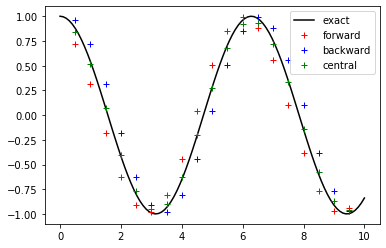

In [10]:
# spacing between x points
dx=0.5

x=np.arange(0,10+dx,dx)
y=np.sin(x)

dydx_fwd=(y[2:]-y[1:-1])/dx
dydx_bwd=(y[1:-1]-y[:-2])/dx
dydx_cen=(y[2:]-y[:-2])/(2*dx)

# exact derivative using a smooth function
xx=np.linspace(0,10,100)

import matplotlib.pyplot as plt
plt.plot(xx,np.cos(xx),'k-',label='exact')

# our approximations
plt.plot(x[1:-1],dydx_fwd,'r+',label='forward')
plt.plot(x[1:-1],dydx_bwd,'b+',label='backward')
plt.plot(x[1:-1],dydx_cen,'g+',label='central')

plt.legend()
plt.show()

Would our finite difference formulas depend on the 'grid spacing', which is the difference between consecutive $x$ entries? Remember that the continuous limit requires the points to be as small as possible: the derivative is really defined as the limiting case when the two points approach each other! Create a finer grid spacing above (try `dx=0.25`, `dx=0.1`, ...) to mimic this effect and see if our numerical approximations get closer to the exact derivative.

You should notice two things again:
* the error relative to the exact line reduces with smaller spacing $dx$ between points. This means, when possible, use a finer resolution of the independent variable
* for a given gap size $dx$, the central difference does a better job of approximating the derivative.


In the following sections, we will learn how to quantify this error, how to generate accurate finite difference formulas, and how to consistently take care of end effects.




<a id='taylor'></a>



### Taylor series expansions and truncation errors

Recall how Newton's method for root-finding was just a rearrangement of the leading terms of the Taylor series expansion. Similar ideas can be used to generate finite difference formulas.


Lets consider a function $f(x)$ and call the difference between consecutive points of the independent variable $h$: so $h=x_{i+1}-x_{i}$. For all formulas below, we will assume that the 'grid' is uniformly spaced, meaning all $x$ locations are at regular intervals. 

We can then write out the Taylor series expansion of the value of the function at an adjacent point $f(x_{i+1})$ around the current point $f(x_i)$ as:

$$  f(x_{i+1}) = f(x_i) + h f'(x_{i}) + \frac{h^2}{2!} f''(x_{i}) +  \frac{h^3}{3!} f'''(x_{i}) + \ldots $$


And we are interested in the derivative at the current point or $f'(x_{i})$. Dividing the above equation by $h$ and rearranging for the derivative gives:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_i)}{h} - \frac{h}{2!} f''(x_{i}) -  \frac{h^2}{3!} f'''(x_{i}) + \ldots $$


This means that if our grid spacing or the distance $h$ between $x$ data points is small, the first term on the right-hand side is big relative to the following terms. Like we did previously in tutorial 5, we can ignore higher-order terms and write approximately:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_i)}{h} + O(h) $$

The $O$ here stands for 'order of', meaning that the *truncation error* is 'of the order of $h$'. We do not know the exact value of the error but we can say that a smaller value of $h$ gives smaller error (like we saw with the sine example above)

This is indeed the forward difference formula for the first derivative. More formally, this is called the **two-point forward difference** to contrast it with other formulas we will derive below.

The backward difference can be similarly derived by writing the Taylor series expansion of the value of the function at an backward point $f(x_{i-1})$ around the current point $f(x_i)$. Here, $x_{i-1}=x_i-h$, giving:

$$  f(x_{i-1}) = f(x_i) - h f'(x_{i}) + \frac{h^2}{2!} f''(x_{i}) -  \frac{h^3}{3!} f'''(x_{i}) + \ldots $$

Rearranging for the derivative $f'(x_{i})$ like before gives the **two-point backward difference** :

$$  f'(x_{i}) = \frac{f(x_{i}) - f(x_{i-1})}{h} + O(h) $$


Deriving the **two-point central difference** formula requires a clever manipulation. For this, subtract the Taylor expansion for $f(x_{i-1})$ from the expansion for $f(x_{i+1})$ above to give:

$$  f(x_{i+1})-f(x_{i-1}) = 2 h f'(x_{i})  +  \frac{2 h^3}{3!} f'''(x_{i}) + \ldots $$

Dividing through by $2h$ and rearranging for the derivative $f'(x_{i})$ now gives:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_{i-1})}{2 h} + O(h^2) $$

Note that the truncation error in the central difference is $O(h^2)$ or 'second-order', which implies a better accuracy than forward or backward difference. This is consistent with our observation with sample data sets above that central difference is more accurate. 

Another way to interpret truncation errors is as follows: reducing the grid size $h$ by half in a first-order method (one with error $O(h)$ like the forward or backward difference) reduces the error by half. Reducing $h$ ten times reduces error ten times, and so on. However, halving the grid size in a second-order method (one with error $O(h^2)$ like the central difference) reduces the truncation erros by a fourth! Reducing $h$ ten times in a central difference formula reduces the error a hundred fold! So, higher-order accuracy is always better as we can rapidly get much closer to the real derivative by reducing grid sizes much more efficiently. We saw this trend too with the examples above. When possible, we will therefore try to use at least $O(h^2)$ formulas.


We can use this information to write the following code that calculates the numerical derivative of a user-defined function $f(x)$ at a point $x=a$. This is achieved by generating neighboring points at $a+h$ and $a-h$ and using the central difference formula. Since the error is proportional to $h^2$ with central differences, it makes sense to choose a small number (and certainly we need $h<1$) :

In [1]:
# find derivative to second order truncation error using two-point central difference
# input user defined function f and a point a, returns df/dx at x=a

def func_deriv(f,a):
    
    # small number, smaller the better
    h=0.01
    
    # create neighboring data points at a+h and a-h
    f_front=f(a+h)
    f_back=f(a-h)
    
    dfdx=(f_front-f_back)/(2*h)
    
    return dfdx

Then, we can find the numerical value of the derivative of any continuous function at any point as follows:

In [4]:
# function definition
def f(x): return np.sin(x)

func_deriv(f,np.pi/4)

0.7070949961324513

Notice that `func_deriv` is written in a vectorized format. This means we can input a vector or a range of values for $a$ and get all derivative values simultaneously:

In [50]:
a_values=np.arange(0,np.pi+np.pi/8,np.pi/8)

func_deriv(f,a_values)

array([ 0.99998333,  0.92386413,  0.707095  ,  0.38267705,  0.        ,
       -0.38267705, -0.707095  , -0.92386413, -0.99998333])

Let's convince ourselves that the derivative is indeed correct and looks like a cosine by plotting it with a finer spacing: 

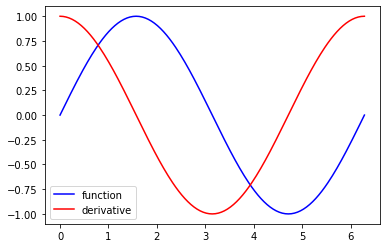

In [11]:
a_values=np.arange(0,2*np.pi+np.pi/100,np.pi/100)

# plot function (sine) at all a values
plt.plot(a_values,f(a_values),'b',label='function') 
# plot calculated derivative (must be cos if accurate) at all a values
plt.plot(a_values,func_deriv(f,a_values),'r',label='derivative')

plt.legend()
plt.show()

Try different functions $f(x)$ above. For example, try $y(x)=(x^2-x^3+5)/(x^3+1)$ or $y(x)=e^{-x^2/10}\cos(x)$. When the exact derivative can be found by hand, compare to ensure central differences give acccurate results. Remember that reducing the spacing $h$ reduces error by $h^2$. So we can get far more accurate by choosing smaller spacing between neighboring points.

<a id='end'></a>



### End corrections

Real measurements or simulated data often do not have an obvious functional form, so we cannot arbitrarily generate points. So we will have to make do with the provided values and grid spacing. An issue then are the end points: central differences would not work there, and we cannot use simple forward or backward differences because the truncation errors would not be consistent.

The Taylor series method provides a step-by-step routine to develop consistent end corrections. For example, while at the first data point, we can write a Taylor expansions for the second and third points as follows:

$$ f(x_{1}) = f(x_0) + h f'(x_{0}) + \frac{h^2}{2!} f''(x_{0}) +  \frac{h^3}{3!} f'''(x_{0}) + \ldots \\
f(x_{2}) = f(x_0) + 2h f'(x_{0}) + \frac{(2h)^2}{2!} f''(x_{0}) +  \frac{(2h)^3}{3!} f'''(x_{0}) + \ldots $$

Recall how we used a linear combination of two such expansions to get a central difference earlier. Similarly, if we wish to somehow combine these two to get an approximate formula with a truncation error of $O(h^2)$, we need the terms with the second derivatives to vanish. This can be achieved by multiplying the first equation by four and subtracting it from the second equation, to give:

$$ f(x_{2})-4f(x_{1}) = -3f(x_0) - 2h f'(x_{0})  + \frac{4h^3}{3!} f'''(x_{0}) + \ldots $$

Dividing through by $2h$ and rearranging to find $f'(x_{0})$ gives:

$$ f'(x_{0})  = \frac{-3f(x_0) + 4f(x_{1})  -f(x_{2})}{2h}  + O(h^2) $$

This is called the **three-point forward difference**, and it gives the derivative to second-order accuracy at the beginning of a data set. This is, indeed, the appropriate end correction for the first derivative if we use central differences everywhere else. 

For a data set containing $n$ entries, we can do the exact same thing for the derivative at the last point $f'(x_{n-1})$. Derive this by writing Taylor expansions for $f(x_{n-2})$ and $f(x_{n-3})$ in terms of $f(x_{n-1})$ and following similar steps as above. Try it. You should get the **three-point backward difference**:

$$ f'(x_{n-1})  = \frac{3f(x_{n-1}) -  4f(x_{n-2})  +f(x_{n-3})}{2h}  + O(h^2) $$

With these three-point formulas and the simple two-point central differences, we are now equipped to find the derivative of any 1D array to $O(h^2)$ accuracy so long as the independent variable is equally spaced. The following code is one way to do it:

In [12]:
# find derivative to second order truncation error
# three-point difference at end points
# two-point central difference everywhere else
# input y and equally spaced x vectors, returns dy/dx

def data_deriv(y,x):
    h=x[1]-x[0] # determine spacing
    dydx=np.zeros(y.shape) # initialize
    
    # first point
    dydx[0]=(-3*y[0]+4*y[1]-y[2])/(2*h)
    #last point
    dydx[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
    # all other points, vectorized
    dydx[1:-1]=(y[2:]-y[:-2])/(2*h)
    
    return dydx

We can now use this to find the derivative of *any* data array corresponding to equal spacing in the independent variable! For example, the following array contains positions of a tracked particle between $t=2$ and $t=6$ seconds as $0.2$ second intervals:

In [13]:
x=np.array([ 7.87 , 6.23 , 4.55 , 2.89 , 1.33, -0.09, -1.31, -2.31,-3.06 , -3.55,
 -3.78 ,-3.77 ,-3.52 ,-3.08 ,-2.46 ,-1.72 ,-0.88 ,-0.   , 0.9  , 1.77 , 2.59])

t=np.arange(2,6.1,0.2)

We cannot use `func_deriv` because it's not clear what function passes through these data points. However, we can use `data_deriv` because all we need to provide are $x$ and $t$ data sets and it autoatically takes care of finding the appropriate spacing and correcting for end effects:

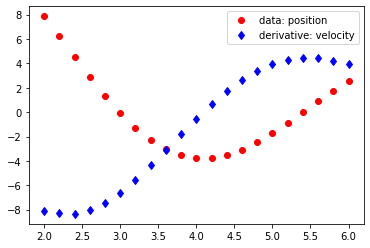

In [14]:
# find derivative of data set
dxdt=data_deriv(x,t)

# plot
plt.plot(t,x,'ro',label='data: position')
plt.plot(t,dxdt,'bd',label='derivative: velocity')

plt.legend()
plt.show()

Of course, the approximation gets better if the data has more 'resolution', in the sense that measurements are taken at more frequent intervals in $t$.

<a id='higher'></a>



### Higher derivatives and higher-order methods

The same Taylor series approach provides approximations for higher derivatives. The basic trick is to look for linear combinations of Taylor expansions for neighboring points so as to obtain the term we need. Recall how we subtracted the expansion for $f(x_{i-1})$ from the expansion for $f(x_{i+1})$ to get rid of the second derivative term and obtain the central difference formula. Instead, if we added the two expansions, we would get rid of the first derivative term and obtain:

$$ f(x_{i+1})+f(x_{i-1}) = 2 f(x_{i})  +  \frac{2 h^2}{2!} f''(x_{i}) +  \frac{2 h^4}{4!} f''''(x_{i}) +\ldots$$

Dividing through by $h^2$ and rearranging gives:

$$ f''(x_{i}) = \frac{f(x_{i+1})- 2 f(x_{i}) + f(x_{i-1})}{h^2}  + O(h^2)$$

This is the **second-order accurate three-point central difference formula for the second derivative**. 


Similar approaches can be used as before for the end corrections with consistent truncation error. For instance, multiplying the expansion for $f(x_1)$ by two and subtracting the result from the expansion for $f(x_2)$ gives (try this by hand):

$$  f''(x_{0}) = \frac{2f(x_0)  -5 f(x_{1}) + 4f(x_{2}) - f(x_3)}{h^2} + O(h^2)$$

And similarly for the point other end point at $i=n-1$ (derive this by hand too):

$$  f''(x_{n-1}) = \frac{2f(x_{n-1})  -5 f(x_{n-2}) + 4f(x_{n-3}) - f(x_{n-4})}{h^2} + O(h^2)$$

These latter two are the **second-order accurate three-point one-sided difference formulas for the second derivative**.

We can then write the following code exactly like before to evaluate second derivatives for a user-defined function $f(x)$:

In [50]:
# find second derivative to second order truncation error using three-point central difference
# input user defined function f and a point a, returns d2f/dx2 at x=a

def func_deriv2(f,a):
    
    # small number, smaller the better
    h=0.01
    
    # create neighboring and current data points at a+h,a, and a-h
    f_front=f(a+h)
    f_current=f(a)
    f_back=f(a-h)
    
    d2fdx2=(f_front-2*f_current+f_back)/(h**2)
    
    return d2fdx2

Let's check with a simple sine function:

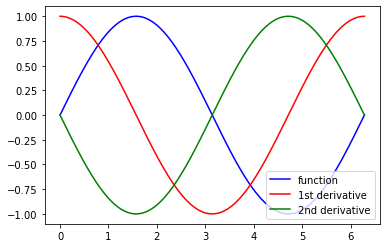

In [82]:
# function definition
def f(x): return np.sin(x)

a_values=np.arange(0,2*np.pi+np.pi/100,np.pi/100)

# plot function (sine) at all a values
plt.plot(a_values,f(a_values),'b',label='function') 

# plot derivative (must be cos if exact) at all a values
plt.plot(a_values,func_deriv(f,a_values),'r',label='1st derivative') 

# plot 2nd derivative (must be -sin if exact) at all a values
plt.plot(a_values,func_deriv2(f,a_values),'g',label='2nd derivative') 

plt.legend(loc='lower right')
plt.show()

Change the function above to make sure this works for any choice of user-defined function.

Similarly, we can evaluate second derivatives of finite data sets. When only a limited number of measurements are provided, we would use neighboring data points instead of generating arbitrary data, and we need to account for the end effect: 

In [16]:
# find second derivative to second order truncation error
# three-point one-sided difference at end points
# three-point central difference everywhere else
# input x and y vectors, returns d2y/dx2

def data_deriv2(y,x):
    h=x[1]-x[0]
    d2ydx2=np.zeros(y.shape) # initialize
    
    # first point
    d2ydx2[0]=(2*y[0]-5*y[1]+4*y[2]-y[3])/(h**2)
    #last point
    d2ydx2[-1]=(2*y[-1]-5*y[-2]+4*y[-3]-y[-4])/(h**2)
    # all other points, vectorized
    d2ydx2[1:-1]=(y[2:]-2*y[1:-1]+y[:-2])/(h**2)
    
    return d2ydx2

And let's check with the same data set as before:

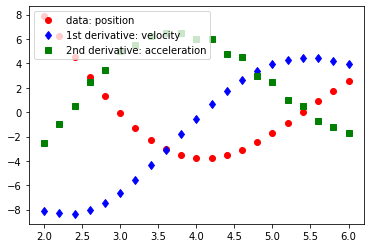

In [17]:
x=np.array([ 7.87 , 6.23 , 4.55 , 2.89 , 1.33, -0.09, -1.31, -2.31,-3.06 , -3.55,
 -3.78 ,-3.77 ,-3.52 ,-3.08 ,-2.46 ,-1.72 ,-0.88 ,-0.   , 0.9  , 1.77 , 2.59])

t=np.arange(2,6.1,0.2)

# find 1st derivative of data set
dxdt=data_deriv(x,t)
# find 2st derivative of data set
d2xdt2=data_deriv2(x,t)

# plot
plt.plot(t,x,'ro',label='data: position')
plt.plot(t,dxdt,'bd',label='1st derivative: velocity')
plt.plot(t,d2xdt2,'gs',label='2nd derivative: acceleration')

plt.legend(loc='upper left')
plt.show()

Third or fourth or higher derivatives can be determined in a similar manner, by linear combinations and substitutions of Taylor expansions with consistent truncation errors. These central differences turn out to be:

$$ f'''(x_{i}) = \frac{f(x_{i+2})- 2 f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2})}{2h^2}  + O(h^2)$$

$$ f''''(x_{i}) = \frac{f(x_{i+2})- 4 f(x_{i+1})+6 f(x_{i}) - 4f(x_{i-1}) + f(x_{i-2})}{h^2}  + O(h^2)$$

Also, higher-order truncation error formulas can be obtained for all derivatives. For example, the first and second derivative to fourth-order accuracy are:

$$ f'(x_{i}) = \frac{-f(x_{i+2}) + 8 f(x_{i+1})- 8f(x_{i-1}) + f(x_{i-2})}{12 h}  + O(h^4)$$

$$ f''(x_{i}) = \frac{-f(x_{i+2}) + 16 f(x_{i+1}) -30 f(x_{i}) + 16f(x_{i-1}) -f(x_{i-2})}{12 h^2}  + O(h^4)$$

... and so on. Notice that higher derivatives or higher accuracy approximations need more information or data corresponding to more neighbors. Tables of these coefficients and corresponding end-corrections are readily available in textbooks (or [see here](https://en.wikipedia.org/wiki/Finite_difference_coefficient)). 


<a id='others'></a>



## (7.2) Numerical Partial Differentiation

Finite differences are straightforward and give us full control over the accuracy and details of the derivative approximation. We can easily extend this idea to partial derivatives where a function depends on multiple independent variables.

<a id='partial'></a>



### Partial finite differences

Numerical approximations to partial derivatives work exactly like with simple derivatives, with the Taylor approximation along the appropriate direction. For example, if we knew the temperture $T(x,y)$ of a plate as a function of $x$ and $y$, then the definitions of the partial derivatives at the point $(x,y)=(a,b)$ are as follows:

$$ \left. \frac{\partial T}{\partial x} \right|_{(x,y)=(a,b)} = \lim_{x \to a} \frac{f(x,b)-f(a,b)}{x-a} \\
   \left. \frac{\partial T}{\partial y} \right|_{(x,y)=(a,b)} = \lim_{y \to b} \frac{f(a,y)-f(a,b)}{y-b} $$
   
Following this logic, an approximation for the finite differences at discrete points $(x_i,y_j)$ can be written as

$$ \left. \frac{\partial T}{\partial x} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_{i+1},y_j)-f(x_i,y_j)}{h_x} + O(h_x)\\
   \left. \frac{\partial T}{\partial y} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_i,y_{j+1})-f(x_i,y_j)}{h_y}  + O(h_y)$$
   
These are indeed the two-point forward partial differences. Here, $h_x$ and $h_y$ are spacings in the $x$ and $y$ directions respectively, and the two need not be the same value.

We can construct second-order accurate differences in the two directions like before. The formulas are exactly the same as before, with changes in $x$ or $y$ extracted as required:

$$ \left. \frac{\partial T}{\partial x} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_{i+1},y_j)-f(x_{i-1},y_j)}{2h_x} + O(h_x^2) \\
   \left. \frac{\partial T}{\partial y} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_i,y_{j+1})-f(x_i,y_{j-1})}{2h_y}  + O(h_y^2)$$
   
Corresponding one-sided difference also use the exact set of coefficients as before, now applied to either $x$ or $y$ data points as required.

The same idea applies for second derivatives in $x$ or $y$. The central differences are:

$$ \left. \frac{\partial^2 T}{\partial x^2} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_{i+1},y_j)-2f(x_{i},y_j) +f(x_{i-1},y_j)}{h_x^2} + O(h_x^2) \\
   \left. \frac{\partial^2 T}{\partial y^2} \right|_{(x,y)=(x_i,y_j)} = \frac{f(x_i,y_{j+1})-2f(x_i,y_{j}) + f(x_i,y_{j-1})}{h_y^2}  + O(h_y^2)$$
   
We can even obtain mixed derivatives by sequentially applying the first derivatives in $x$ and $y$ directions to get:

$$   \left. \frac{\partial^2 T}{\partial x \partial y} \right|_{(x,y)=(x_i,y_j)} = \frac{\left[f(x_{i+1},y_{j+1})-f(x_{i-1},y_{j+1})\right] - \left[ f(x_{j+1},y_{j-1})-f(x_{i-1},y_{j-1}) \right]}{4 h_x h_y}  + O(h_x h_y)$$

<a id='heat'></a>



### An application: heat conduction

Let's use numerical partial differentiation to explore a common problem in chemical transport phenomena: that of heat transfer. Recall the temperature data set corresponding to a non-uniformyl heated plate (from tutorial 2). The file `smoothtemp.txt` contains the same temperature data smoothed using a moving average filter (tutorial 6). Let's load this data, and determine the number of rows (corresponding to number of y-axis points) and columns (corresponding to number of x-axis points):

In [228]:
F=np.loadtxt("smoothtemp.txt", delimiter=",")
ny,nx=F.shape

This data represents a 20 cm $\times$ 10 cm plate, so let's also create $x$ and $y$ arrays to represent this with the appropriate number of intermediate locations: 

In [276]:
x=np.linspace(0,20,nx)
y=np.linspace(0,10,ny)

We would like to study the flow of heat via heat conduction. According to Fourier's law of heat conduction, the heat flux density ${\bf q}$ (thermal energy flowing per unit area per unit time) is given by the negative of the material's conductivity multiplied by the gradient of temperature:

$$ {\bf q} = - k \nabla T  = -k \frac{\partial T}{\partial x} \,{\bf \hat{e}_x} -k \frac{\partial T}{\partial y} \,{\bf \hat{e}_y} $$

In other words, heat flows in the $x$ direction at a rate $q_x=-k \partial T/\partial x$ and in the $y$ direction at a rate $q_y=-k \partial T/\partial y$. At any point, these two components give the full heat flux vector.

Let's determine $\partial T/\partial x$ numerically. The following code is adapted from `data_deriv` above, with the only changes being that the array is 2D instead of 1D (so we slice columns appropriately) and the spacing is $h_x$ instead of just $h$:

In [277]:
hx=x[1]-x[0]

# initialize
dFdx=np.zeros(F.shape) 
    
# first column: one-sided difference for x-derivatives
dFdx[:,0]=(-3*F[:,0]+4*F[:,1]-F[:,2])/(2*hx)
# last column: one-sided difference for x-derivatives
dFdx[:,-1]=(3*F[:,-1]-4*F[:,-2]+F[:,-3])/(2*hx)
# all other columns, vectorized
dFdx[:,1:-1]=(F[:,2:]-F[:,:-2])/(2*hx)


Similarly, $\partial T/\partial y$ can be approximated by applying the same algorithm vertically on row slices, and using the spacing $h_y$ instead of $h$:

In [278]:
hy=y[1]-y[0]

# initialize
dFdy=np.zeros(F.shape) 
    
# first row: one-sided difference for y-derivatives
dFdy[0,:]=(-3*F[0,:]+4*F[1,:]-F[2,:])/(2*hy)
# last row: one-sided difference for y-derivatives
dFdy[-1,:]=(3*F[-1,:]-4*F[-2,:]+F[-3,:])/(2*hy)
# all other rows, vectorized
dFdy[1:-1,:]=(F[2:,:]-F[:-2,:])/(2*hy)


Let's plot the temperature, heat flow in x-direction, and heat flow in y-direction next. The plate is made of aluminium which has a thermal conductivity $k=237$ Watts/m/K

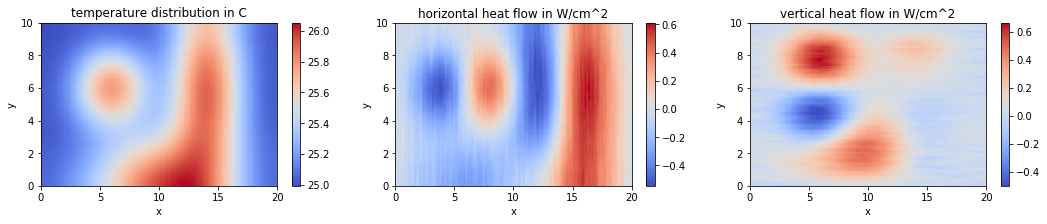

In [281]:
k=2.37 # in Watt/cm/K because our length units are in cm

# heat flow in x-direction
qx = -k*dFdx

# heat flow in y-direction
qy = -k*dFdy

plt.figure(figsize=(18,3))

plt.subplot(131)
plt.pcolormesh(x,y,F,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('temperature distribution in C')

plt.subplot(132)
plt.pcolormesh(x,y,qx,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('horizontal heat flow in W/cm^2')

plt.subplot(133)
plt.pcolormesh(x,y,qy,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('vertical heat flow in W/cm^2')

plt.show()

We can see that heat always flows from the hot regions to the cold regions. The 2nd subplot show regions where the flow is to the right (positive heat flow in x-direction) in red, and to the left in blue. Similarly, the 3rd subplot shows regions where the heat flow is upward in red and downward in blue. Rationalize this with the actual temperature differences in the first subplot.

When we have 2D arrays of component data in two direction such as with $q_x$ and $q_y$ above, it is useful to visualize this together as a vector on a 2D plane. One convenient way to do this is using [quiver plots](https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/quiver_demo.html)). The syntax `plt.quiver(X,Y,U,V)` generates vector 'quivers' at each point corresponding to the horizontal and vertical components `U` and `V` of a data at meshgrid locations in `X` and `Y`. Here, we can use $q_x$ and $q_y$ as our components and plot quivers to better visualize the heat flow:

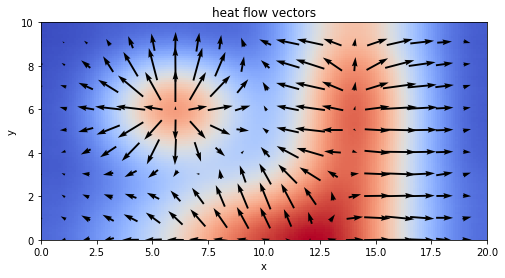

In [251]:
X,Y=np.meshgrid(x,y)

plt.figure(figsize=(8,4))

plt.pcolormesh(x,y,F,cmap='coolwarm')

#overlay heat flow vectors (or plot separately)
plt.quiver(X[::10,::10],Y[::10,::10],qx[::10,::10],qy[::10,::10],pivot='mid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('heat flow vectors')

plt.show()

We have sliced every 10th point in the matrices because the arrows would be too crowded otherwise. Try different numbers to get a sense of how quiverplots look. The `pivot` argument moves the arrow to the middle of the location rather than start at each point: try removing it to see what it looks like.

Plotted this way, we get a very good picture of the heat transfer on the plate. The arrows depict the direction of conductive heat flow (compare with underlying temperature distribution to rationalize the directions), and the length of the arrows are proportional to the amount of heat flowing. 

A similar visualization tool is `streamplot`. The syntax is similar to `quiver`, but `streamplot` connects the arrows to give a sense of the 'flow'. We can additionally manipulate the color, density, thickness and spacing of the 'streamlines' to illustrate more about the data: see [this example](https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/plot_streamplot.html) from the `matplotlib` gallery for ideas.

The following code generates a streamplot with line thickness that corresponds to the magnitude of the heat flux $|q|=\sqrt{q_x^2+q_y^2}$. In fact, the example below uses 5 times $|q|$ for aesthetic purposes: try changing this to enhance the image. Represented this way, thicker lines depict 'stronger' heat flow; compare this with the underlying temperature profile to rationalize how you think heat must be transferred:

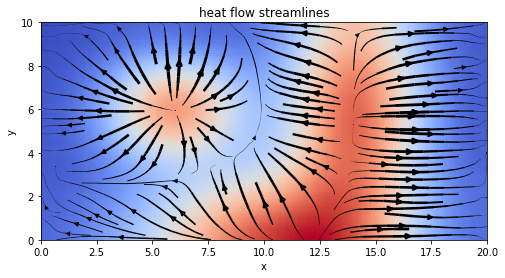

In [260]:
qmag=np.sqrt(qx**2+qy**2)

plt.figure(figsize=(8,4))
plt.pcolormesh(x,y,F,cmap='coolwarm')

#overlay heat flow streamlines (or plot separately)
plt.streamplot(X,Y,qx,qy,linewidth=5*qmag,color='k')

plt.xlabel('x')
plt.ylabel('y')
plt.title('heat flow streamlines')


plt.xlim(0,20)
plt.ylim(0,10)
plt.show()

<a id='inbuilt'></a>



### Inbuilt python routines

As with most engineering calculations, python has inbuilt routines that calculate finite differences. The function `numpy.gradient(y,x)` does precisely the same job as our own `data_deriv(y,x)`, and finds second-order accurate estimates for the first derivative:

In [207]:
x=np.linspace(0,2,6)
y=np.sin(x)

dydx1=data_deriv(y,x)
print('our derivative:',dydx1)
dydx2=np.gradient(y,x)
print('numpy.gradient:',dydx2)

our derivative: [ 1.0503966   0.89669511  0.67827593  0.35277189 -0.02842707 -0.42295381]
numpy.gradient: [ 0.97354586  0.89669511  0.67827593  0.35277189 -0.02842707 -0.22569044]


The values are identical except at the end points! This is because `np.gradient` does not correctly use a second-order accurate formula for the end-points unless specifically asked to. We can do this by specifying the `edge_order` argument:

In [208]:
dydx1=data_deriv(y,x)
print('our derivative:',dydx1)
dydx2=np.gradient(y,x,edge_order=2)  # tell np to use 2nd order formulas at ends
print('numpy.gradient:',dydx2)

our derivative: [ 1.0503966   0.89669511  0.67827593  0.35277189 -0.02842707 -0.42295381]
numpy.gradient: [ 1.0503966   0.89669511  0.67827593  0.35277189 -0.02842707 -0.42295381]


And like with `np.mean` and `np.std` etc, we can specify which axis to take the derivative along. This is useful in calculating partial derivatives along different dimensions. See the [numpy.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html#numpy.gradient) documentation for examples and detailed syntax.


<a id='exer'></a>



### Practice Problems

(1) Evaluate the following functions, their derivatives, and their second derivtives using finite differences in the given range. Plot both. Find the derivative by hand (or using symbolic calculators like [WolframAlpha](https://www.wolframalpha.com)) and compare your numerical approximation to the exact derivatives:

(1a) $\sqrt{x}-x^2 \cos(x)$ between $x=1$ and $x=6$

(1b) The Gaussian function $e^{-x^2}$ between $x=-2$ and $x=2$

(1c) $\displaystyle\frac{\sin(x)}{4x^2-2}$ between $x=4$ and $x=10$

(2) Find the derivative of the caffeine data set from tutorial 4. Plot the given data and the evaluated derivatives. Find the derivative of the fitted line from tutorial 4 by hand, and overlay it on your numerical derivatives to see if they match.

$$\begin{matrix} {\rm Time~(hours)} & 0 & 3 & 6 & 9 & 12 & 15 & 18 & 21 & 24\\{\rm Caffeine~(mg)}& 101.37 &  63.73&  41.34&  28.86&
        13.90&  14.11&  6.75 &  5.14& 5.79 \end{matrix}$$

(3) The altitude of the space shuttle during the first two minutes of ascent is as follows. Find the velocity and acceleration as a function of time. Plot both.

$$\begin{matrix} {\rm t~(s)} &0 & 10 &20 &30 &40 &50 &60 &70 &80 &90 &100 &110 &120\\{\rm h~(m)} &-8&241&1244&2872&5377&8130&11617&15380&19872&25608&31412&38309&44726 \end{matrix}$$

(4) The Langevin function arises commonly in describing paramagnetism, and is given as:

$$ L(m) = \frac{e^{m}+e^{-m}}{e^{m}-e^{-m}} - \frac{1}{m}$$

Find and plot the derivative and second derivative of the Langevin function between -5 and 5.

*Note that division by 0 will produce errors, so generate points such that 0 is not included*

(5) The heat equation states that the rate of change of temperature $\dot{T}$ at every point is given by the thermal diffusivity multiplied by the Laplacian of the temperature:

$$ \dot{T}= D\nabla^2 T = D\frac{\partial^2 T}{\partial x^2} + D\frac{\partial^2 T}{\partial y^2}  $$

The thermal diffusivity of aluminium is $0.97 ~{\rm cm^2/s}$. Find $\dot{T}$ at every point on the plate from the `smoothtemp.txt` data set and represent it in pseudocolor.

What do negative or positive values of $\dot{T}$ at a point physically represent?

(6) Create packaged functions to evaluate first and second derivates to fourth-order accuracy (meaning an error of $O(h^4)$), properly accounting for end effects. Find the coefficients in the tables [here](https://en.wikipedia.org/wiki/Finite_difference_coefficient). 